# 无监督学习---数据预处理: 聚类,主成分分析

## 1. 数据缩放 MinMaxScaler,RobustScaler,StandardScaler

In [1]:
#导入相关模块
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
%matplotlib inline

#忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')  
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
#导入数据并对数据进行切分
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state = 1)

#归一化 MinMaxScaler,同理,还可以标准化数据 StandardScaler,四分位标准化 RobusstScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(x_train)
x_train_scaler = model.transform(x_train)

#也可以使用方法链
x_train_scaler = MinMaxScaler().fit(x_train).transform(x_train)

#打印变换前后的数据
print("转换前最小值:\n{}".format(x_train.min(axis =0)))
print("转换前最大值:\n{}".format(x_train.max(axis =0)))
#打印转换后
print("转换前最小值:\n{}".format(x_train_scaler.min(axis =0)))
print("转换前最大值:\n{}".format(x_train_scaler.max(axis =0)))

转换前最小值:
[  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
转换前最大值:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   9.37900000e-01   9.60800000e-01

## 2. 主成分分析(PCA) -------主要用于降维,特征提取

#### 2.1 降维度及可视化

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_Scaler = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components=4) #保留数据前3个主成分
pca.fit(X_Scaler)

#将数据变换到前三个主成分方向上
x_pca = pca.transform(X_Scaler)
print("原始数据:{}".format(str(X_Scaler.shape)))
print("降维后的数据:{}".format(str(x_pca.shape)))

原始数据:(569, 30)
降维后的数据:(569, 4)


Text(0,0.5,'4th')

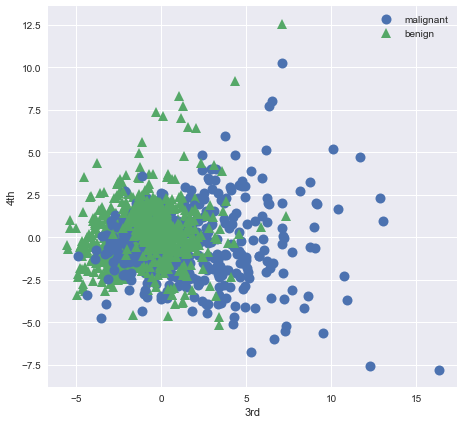

In [25]:
plt.figure(figsize=(10,7))
mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("1st")
plt.ylabel("2nd")
#######################################
mglearn.discrete_scatter(x_pca[:,2],x_pca[:,3],cancer.target)
plt.legend(cancer.target_names,loc="bad")
plt.gca().set_aspect("equal")
plt.xlabel("3rd")
plt.ylabel("4th")

## 3.聚类 -K均值

In [41]:
#导入数据及k均值分类器
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#生成二维数据
X,y = make_blobs(random_state = 1)
#构建聚类模型
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 0,
       2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

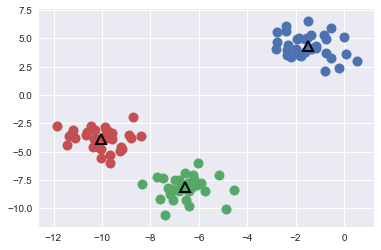

In [43]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers="o")
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers="^",markeredgewidth=2)

## 凝聚类 agglomerative clustering

In [45]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state = 1)
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

Text(0,0.5,'Feature 1')

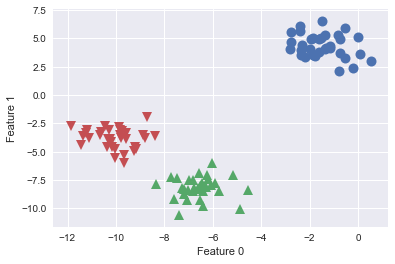

In [48]:
mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.grid(True)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## DBSCAN聚类----------优点:不需要设置,需要将数据先标准化

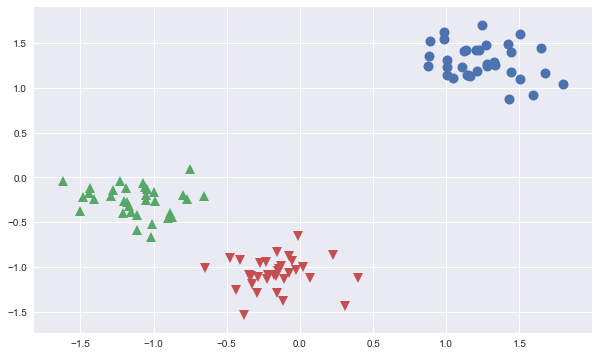

In [55]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state = 1)
#数据标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#无需设置簇的个数, 但需要先将数据标准化
model = scaler.fit(X)
X_scaler = model.transform(X)
from sklearn.cluster import DBSCAN
dbs = DBSCAN()
pred = dbs.fit_predict(X_scaler)
plt.figure(figsize=(10,6))
mglearn.discrete_scatter(X_scaler[:,0],X_scaler[:,1],pred)

### 聚类算法对比
#### k-means 最常用, 但需要预先设定簇的个数, DBSCAN 可以自动判断簇的数量, 使用与无法预算判断簇的数量的复杂数据集, 凝聚类即是分层聚类,类似加权平均数